In [723]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scipy.sparse as sp

# Load your dataset
df = pd.read_csv('spam.csv')

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['text'])
y = df['label']

vectorizer.get_feature_names_out()
print(X.shape)


(5572, 8673)


### Make a Balance

In [724]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_csv('spam.csv')

# Separate features (X) and target labels (y)
X = df['text']
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000000)  # You can adjust the number of features

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Print the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

# Now, X_train_resampled and y_train_resampled contain the balanced training data


Class distribution before SMOTE:
label
ham     3860
spam     597
Name: count, dtype: int64

Class distribution after SMOTE:
label
ham     3860
spam    3860
Name: count, dtype: int64


## Lib 


In [725]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## KNN


In [726]:


# Define the K-NN pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train the K-NN model on the TF-IDF transformed data
knn_pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the TF-IDF transformed test data
y_pred_knn = knn_pipeline.predict(X_test_tfidf)

# Evaluate the K-NN model's performance
print("K-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("K-NN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


K-NN Classification Report:
              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       965
        spam       0.92      0.63      0.75       150

    accuracy                           0.94      1115
   macro avg       0.93      0.81      0.86      1115
weighted avg       0.94      0.94      0.94      1115

K-NN Confusion Matrix:
[[957   8]
 [ 56  94]]


## LR Model

In [727]:
# Logistic Regression
LR_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('logReg', LogisticRegression(penalty="l2", C=1.0))
])

# Logistic Regression
LR_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_lr = LR_pipeline.predict(X_test_tfidf)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115

Logistic Regression Confusion Matrix:
[[964   1]
 [ 16 134]]


## SVM Model

In [728]:

# Support Vector Classifier (SVC) with different kernels
svc_linear_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('svc', SVC(kernel='linear', class_weight='balanced'))
])

svc_poly_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('svc', SVC(kernel='poly', degree=3, class_weight='balanced'))
])

svc_rbf_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('svc', SVC(kernel='rbf', gamma='scale', class_weight='balanced'))
])


# SVC with linear kernel
svc_linear_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_svc_linear = svc_linear_pipeline.predict(X_test_tfidf)
print("\nSVC (Linear Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svc_linear))
print("SVC (Linear Kernel) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_linear))

# SVC with polynomial kernel
svc_poly_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_svc_poly = svc_poly_pipeline.predict(X_test_tfidf)
print("\nSVC (Polynomial Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svc_poly))
print("SVC (Polynomial Kernel) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_poly))

# SVC with RBF kernel
svc_rbf_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_svc_rbf = svc_rbf_pipeline.predict(X_test_tfidf)
print("\nSVC (RBF Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svc_rbf))
print("SVC (RBF Kernel) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_rbf))



SVC (Linear Kernel) Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.88      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

SVC (Linear Kernel) Confusion Matrix:
[[965   0]
 [ 18 132]]

SVC (Polynomial Kernel) Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.17      0.29       965
        spam       0.16      0.99      0.27       150

    accuracy                           0.28      1115
   macro avg       0.58      0.58      0.28      1115
weighted avg       0.88      0.28      0.28      1115

SVC (Polynomial Kernel) Confusion Matrix:
[[161 804]
 [  1 149]]

SVC (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.0

## NR Model

In [729]:
# Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB(alpha=1.0)


# Gaussian Naive Bayes
gnb.fit(X_train_resampled.toarray(), y_train_resampled)
y_pred_gnb = gnb.predict(X_test_tfidf.toarray())
print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print("Gaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

# Multinomial Naive Bayes
mnb.fit(X_train_resampled, y_train_resampled)
y_pred_mnb = mnb.predict(X_test_tfidf)
print("\nMultinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_mnb))
print("Multinomial Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))

# Bernoulli Naive Bayes
bnb.fit(X_train_resampled, y_train_resampled)
y_pred_bnb = bnb.predict(X_test_tfidf)
print("\nBernoulli Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_bnb))
print("Bernoulli Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))




Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.90      0.94       965
        spam       0.57      0.90      0.70       150

    accuracy                           0.90      1115
   macro avg       0.78      0.90      0.82      1115
weighted avg       0.93      0.90      0.91      1115

Gaussian Naive Bayes Confusion Matrix:
[[865 100]
 [ 15 135]]

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       965
        spam       0.89      0.91      0.90       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Multinomial Naive Bayes Confusion Matrix:
[[948  17]
 [ 13 137]]

Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.98  

In [730]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

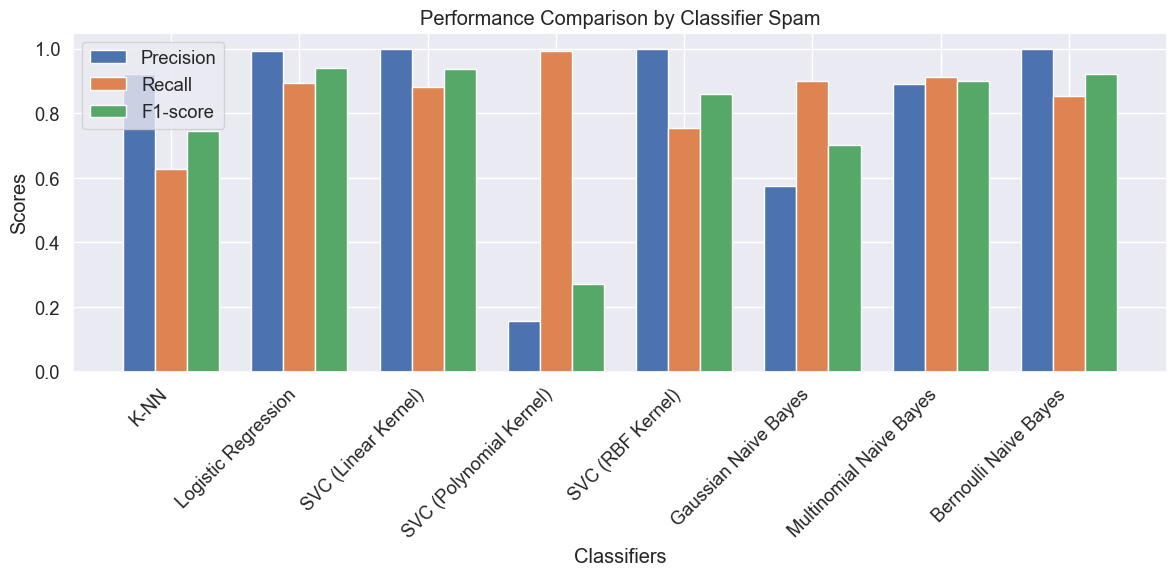

In [731]:

# Define the classifiers and their names
classifiers = [
    "K-NN",
    "Logistic Regression",
    "SVC (Linear Kernel)",
    "SVC (Polynomial Kernel)",
    "SVC (RBF Kernel)",
    "Gaussian Naive Bayes",
    "Multinomial Naive Bayes",
    "Bernoulli Naive Bayes"
]

# Define the corresponding metrics (precision, recall, F1-score) for each classifier
precision = [
    precision_score(y_test, y_pred_knn, pos_label='spam'),
    precision_score(y_test, y_pred_lr, pos_label='spam'),
    precision_score(y_test, y_pred_svc_linear, pos_label='spam'),
    precision_score(y_test, y_pred_svc_poly, pos_label='spam'),
    precision_score(y_test, y_pred_svc_rbf, pos_label='spam'),
    precision_score(y_test, y_pred_gnb, pos_label='spam'),
    precision_score(y_test, y_pred_mnb, pos_label='spam'),
    precision_score(y_test, y_pred_bnb, pos_label='spam')
]

recall = [
    recall_score(y_test, y_pred_knn, pos_label='spam'),
    recall_score(y_test, y_pred_lr, pos_label='spam'),
    recall_score(y_test, y_pred_svc_linear, pos_label='spam'),
    recall_score(y_test, y_pred_svc_poly, pos_label='spam'),
    recall_score(y_test, y_pred_svc_rbf, pos_label='spam'),
    recall_score(y_test, y_pred_gnb, pos_label='spam'),
    recall_score(y_test, y_pred_mnb, pos_label='spam'),
    recall_score(y_test, y_pred_bnb, pos_label='spam')
]

f1 = [
    f1_score(y_test, y_pred_knn, pos_label='spam'),
    f1_score(y_test, y_pred_lr, pos_label='spam'),
    f1_score(y_test, y_pred_svc_linear, pos_label='spam'),
    f1_score(y_test, y_pred_svc_poly, pos_label='spam'),
    f1_score(y_test, y_pred_svc_rbf, pos_label='spam'),
    f1_score(y_test, y_pred_gnb, pos_label='spam'),
    f1_score(y_test, y_pred_mnb, pos_label='spam'),
    f1_score(y_test, y_pred_bnb, pos_label='spam')
]

# Create a bar plot
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision')
bar2 = ax.bar(x, recall, width, label='Recall')
bar3 = ax.bar(x + width, f1, width, label='F1-score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison by Classifier Spam')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


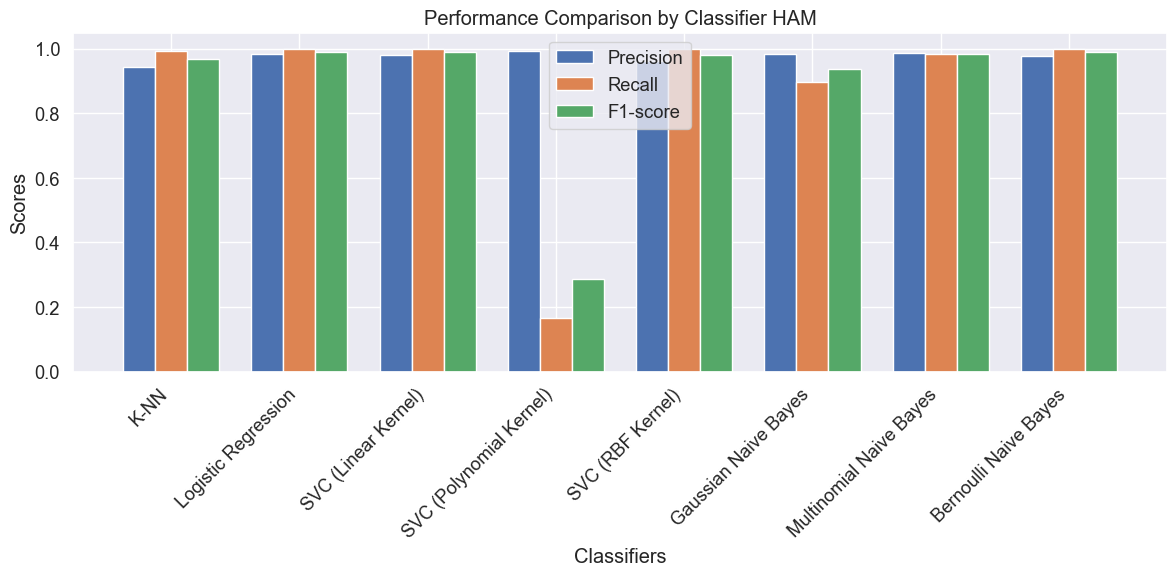

In [732]:


# Define the classifiers and their names
classifiers = [
    "K-NN",
    "Logistic Regression",
    "SVC (Linear Kernel)",
    "SVC (Polynomial Kernel)",
    "SVC (RBF Kernel)",
    "Gaussian Naive Bayes",
    "Multinomial Naive Bayes",
    "Bernoulli Naive Bayes"
]

# Define the corresponding metrics (precision, recall, F1-score) for each classifier
precision = [
    precision_score(y_test, y_pred_knn, pos_label='ham'),
    precision_score(y_test, y_pred_lr, pos_label='ham'),
    precision_score(y_test, y_pred_svc_linear, pos_label='ham'),
    precision_score(y_test, y_pred_svc_poly, pos_label='ham'),
    precision_score(y_test, y_pred_svc_rbf, pos_label='ham'),
    precision_score(y_test, y_pred_gnb, pos_label='ham'),
    precision_score(y_test, y_pred_mnb, pos_label='ham'),
    precision_score(y_test, y_pred_bnb, pos_label='ham')
]

recall = [
    recall_score(y_test, y_pred_knn, pos_label='ham'),
    recall_score(y_test, y_pred_lr, pos_label='ham'),
    recall_score(y_test, y_pred_svc_linear, pos_label='ham'),
    recall_score(y_test, y_pred_svc_poly, pos_label='ham'),
    recall_score(y_test, y_pred_svc_rbf, pos_label='ham'),
    recall_score(y_test, y_pred_gnb, pos_label='ham'),
    recall_score(y_test, y_pred_mnb, pos_label='ham'),
    recall_score(y_test, y_pred_bnb, pos_label='ham')
]

f1 = [
    f1_score(y_test, y_pred_knn, pos_label='ham'),
    f1_score(y_test, y_pred_lr, pos_label='ham'),
    f1_score(y_test, y_pred_svc_linear, pos_label='ham'),
    f1_score(y_test, y_pred_svc_poly, pos_label='ham'),
    f1_score(y_test, y_pred_svc_rbf, pos_label='ham'),
    f1_score(y_test, y_pred_gnb, pos_label='ham'),
    f1_score(y_test, y_pred_mnb, pos_label='ham'),
    f1_score(y_test, y_pred_bnb, pos_label='ham')
]

# Create a bar plot
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision')
bar2 = ax.bar(x, recall, width, label='Recall')
bar3 = ax.bar(x + width, f1, width, label='F1-score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison by Classifier HAM')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


### HeatMap(Spam)

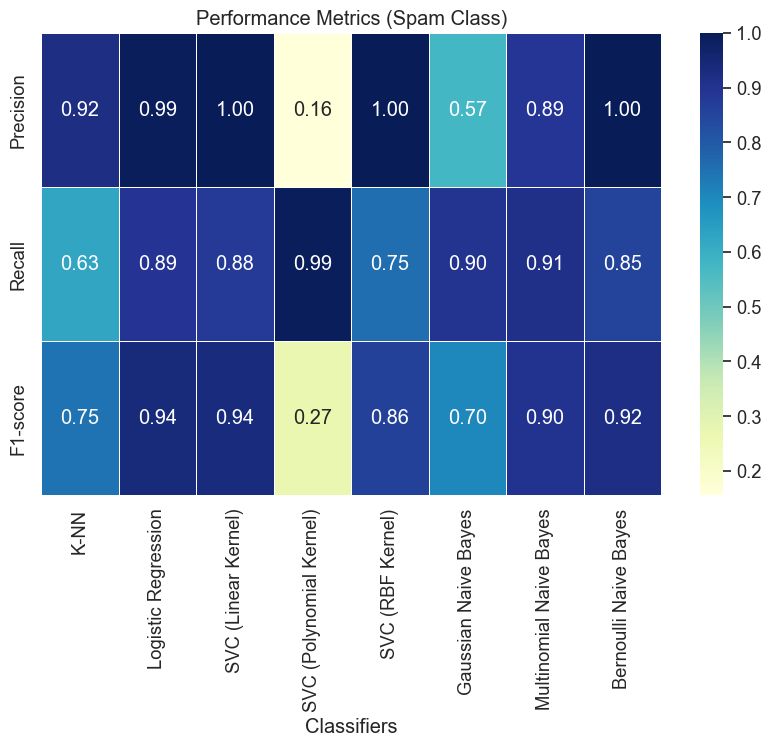

In [733]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the classifiers and their names
classifiers = [
    "K-NN",
    "Logistic Regression",
    "SVC (Linear Kernel)",
    "SVC (Polynomial Kernel)",
    "SVC (RBF Kernel)",
    "Gaussian Naive Bayes",
    "Multinomial Naive Bayes",
    "Bernoulli Naive Bayes"
]

# Define the corresponding metrics (precision, recall, F1-score) for each classifier for spam class
precision_spam = [
    precision_score(y_test, y_pred_knn, pos_label='spam'),
    precision_score(y_test, y_pred_lr, pos_label='spam'),
    precision_score(y_test, y_pred_svc_linear, pos_label='spam'),
    precision_score(y_test, y_pred_svc_poly, pos_label='spam'),
    precision_score(y_test, y_pred_svc_rbf, pos_label='spam'),
    precision_score(y_test, y_pred_gnb, pos_label='spam'),
    precision_score(y_test, y_pred_mnb, pos_label='spam'),
    precision_score(y_test, y_pred_bnb, pos_label='spam')
]

recall_spam = [
    recall_score(y_test, y_pred_knn, pos_label='spam'),
    recall_score(y_test, y_pred_lr, pos_label='spam'),
    recall_score(y_test, y_pred_svc_linear, pos_label='spam'),
    recall_score(y_test, y_pred_svc_poly, pos_label='spam'),
    recall_score(y_test, y_pred_svc_rbf, pos_label='spam'),
    recall_score(y_test, y_pred_gnb, pos_label='spam'),
    recall_score(y_test, y_pred_mnb, pos_label='spam'),
    recall_score(y_test, y_pred_bnb, pos_label='spam')
]

f1_spam = [
    f1_score(y_test, y_pred_knn, pos_label='spam'),
    f1_score(y_test, y_pred_lr, pos_label='spam'),
    f1_score(y_test, y_pred_svc_linear, pos_label='spam'),
    f1_score(y_test, y_pred_svc_poly, pos_label='spam'),
    f1_score(y_test, y_pred_svc_rbf, pos_label='spam'),
    f1_score(y_test, y_pred_gnb, pos_label='spam'),
    f1_score(y_test, y_pred_mnb, pos_label='spam'),
    f1_score(y_test, y_pred_bnb, pos_label='spam')
]

# Create a DataFrame to store the data
data_spam = pd.DataFrame({
    'Classifiers': classifiers,
    'Precision': precision_spam,
    'Recall': recall_spam,
    'F1-score': f1_spam
})

# Create a heatmap for spam class
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(data_spam.set_index('Classifiers').T, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Performance Metrics (Spam Class)')
plt.show()




### HAM

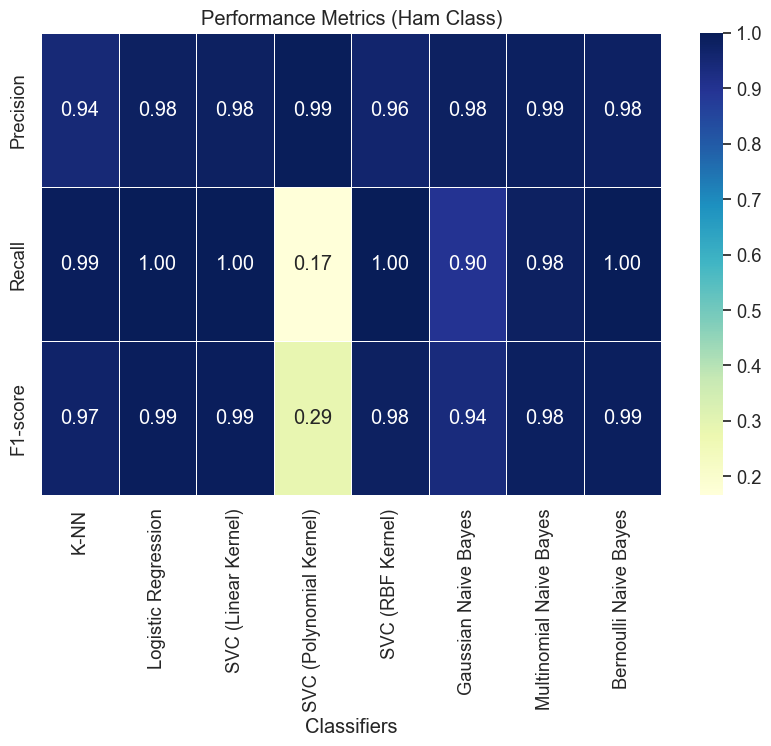

In [734]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the classifiers and their names
classifiers = [
    "K-NN",
    "Logistic Regression",
    "SVC (Linear Kernel)",
    "SVC (Polynomial Kernel)",
    "SVC (RBF Kernel)",
    "Gaussian Naive Bayes",
    "Multinomial Naive Bayes",
    "Bernoulli Naive Bayes"
]

# Define the corresponding metrics (precision, recall, F1-score) for each classifier for ham class
precision_ham = [
    precision_score(y_test, y_pred_knn, pos_label='ham'),
    precision_score(y_test, y_pred_lr, pos_label='ham'),
    precision_score(y_test, y_pred_svc_linear, pos_label='ham'),
    precision_score(y_test, y_pred_svc_poly, pos_label='ham'),
    precision_score(y_test, y_pred_svc_rbf, pos_label='ham'),
    precision_score(y_test, y_pred_gnb, pos_label='ham'),
    precision_score(y_test, y_pred_mnb, pos_label='ham'),
    precision_score(y_test, y_pred_bnb, pos_label='ham')
]

recall_ham = [
    recall_score(y_test, y_pred_knn, pos_label='ham'),
    recall_score(y_test, y_pred_lr, pos_label='ham'),
    recall_score(y_test, y_pred_svc_linear, pos_label='ham'),
    recall_score(y_test, y_pred_svc_poly, pos_label='ham'),
    recall_score(y_test, y_pred_svc_rbf, pos_label='ham'),
    recall_score(y_test, y_pred_gnb, pos_label='ham'),
    recall_score(y_test, y_pred_mnb, pos_label='ham'),
    recall_score(y_test, y_pred_bnb, pos_label='ham')
]

f1_ham = [
    f1_score(y_test, y_pred_knn, pos_label='ham'),
    f1_score(y_test, y_pred_lr, pos_label='ham'),
    f1_score(y_test, y_pred_svc_linear, pos_label='ham'),
    f1_score(y_test, y_pred_svc_poly, pos_label='ham'),
    f1_score(y_test, y_pred_svc_rbf, pos_label='ham'),
    f1_score(y_test, y_pred_gnb, pos_label='ham'),
    f1_score(y_test, y_pred_mnb, pos_label='ham'),
    f1_score(y_test, y_pred_bnb, pos_label='ham')
]

# Create a DataFrame to store the data
data_ham = pd.DataFrame({
    'Classifiers': classifiers,
    'Precision': precision_ham,
    'Recall': recall_ham,
    'F1-score': f1_ham
})

# Create a heatmap for spam class
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(data_ham.set_index('Classifiers').T, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Performance Metrics (Ham Class)')
plt.show()




## ALL AUC ROC

In [735]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC for each classifier
roc_auc_scores = []

# K-NN
y_prob_knn = knn_pipeline.predict_proba(X_test_tfidf)[:, 1]  # Probability of 'spam'
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
roc_auc_scores.append(roc_auc_knn)

# Logistic Regression
y_prob_lr = LR_pipeline.predict_proba(X_test_tfidf)[:, 1]  # Probability of 'spam'
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
roc_auc_scores.append(roc_auc_lr)

# SVC (Linear Kernel)
y_prob_svc_linear = svc_linear_pipeline.decision_function(X_test_tfidf)
roc_auc_svc_linear = roc_auc_score(y_test, y_prob_svc_linear)
roc_auc_scores.append(roc_auc_svc_linear)

# SVC (Polynomial Kernel)
y_prob_svc_poly = svc_poly_pipeline.decision_function(X_test_tfidf)
roc_auc_svc_poly = roc_auc_score(y_test, y_prob_svc_poly)
roc_auc_scores.append(roc_auc_svc_poly)

# SVC (RBF Kernel)
y_prob_svc_rbf = svc_rbf_pipeline.decision_function(X_test_tfidf)
roc_auc_svc_rbf = roc_auc_score(y_test, y_prob_svc_rbf)
roc_auc_scores.append(roc_auc_svc_rbf)

# Gaussian Naive Bayes
y_prob_gnb = gnb.predict_proba(X_test_tfidf.toarray())[:, 1]  # Probability of 'spam'
roc_auc_gnb = roc_auc_score(y_test, y_prob_gnb)
roc_auc_scores.append(roc_auc_gnb)

# Multinomial Naive Bayes
y_prob_mnb = mnb.predict_proba(X_test_tfidf)[:, 1]  # Probability of 'spam'
roc_auc_mnb = roc_auc_score(y_test, y_prob_mnb)
roc_auc_scores.append(roc_auc_mnb)

# Bernoulli Naive Bayes
y_prob_bnb = bnb.predict_proba(X_test_tfidf)[:, 1]  # Probability of 'spam'
roc_auc_bnb = roc_auc_score(y_test, y_prob_bnb)
roc_auc_scores.append(roc_auc_bnb)

# Print ROC AUC scores for each classifier
for i, classifier in enumerate(classifiers):
    print(f"{classifier} ROC AUC: {roc_auc_scores[i]}")


K-NN ROC AUC: 0.8507530224525044
Logistic Regression ROC AUC: 0.9915785837651122
SVC (Linear Kernel) ROC AUC: 0.989699481865285
SVC (Polynomial Kernel) ROC AUC: 0.9186528497409326
SVC (RBF Kernel) ROC AUC: 0.9872607944732297
Gaussian Naive Bayes ROC AUC: 0.8981865284974093
Multinomial Naive Bayes ROC AUC: 0.987419689119171
Bernoulli Naive Bayes ROC AUC: 0.9899620034542315


In [736]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the test data (Replace 'spam.csv' with your actual test data file)
test_data = pd.read_csv('spam.csv')

# Preprocess the test data using the same vectorizer as in training
test_corpus = test_data['text']
test_X = tfidf_vectorizer.transform(test_corpus)  # Use the same vectorizer

# Load the trained Bernoulli Naive Bayes model (initialize and train as in training)
loaded_model = LR_pipeline
loaded_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_test = loaded_model.predict(test_X)

# Evaluate model performance on the test data
accuracy = accuracy_score(test_data['label'], y_pred_test)
roc_auc = roc_auc_score(test_data['label'], loaded_model.predict_proba(test_X)[:, 1])
classification_rep = classification_report(test_data['label'], y_pred_test)
confusion_mat = confusion_matrix(test_data['label'], y_pred_test)

# Print the evaluation metrics
print("Test Accuracy:", accuracy)
print("Test ROC AUC:", roc_auc)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


Test Accuracy: 0.9969490308686288
Test ROC AUC: 0.9989692795361065
Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00      4825
        spam       1.00      0.98      0.99       747

    accuracy                           1.00      5572
   macro avg       1.00      0.99      0.99      5572
weighted avg       1.00      1.00      1.00      5572

Confusion Matrix:
 [[4824    1]
 [  16  731]]


### EXPORT

In [737]:
import joblib

#  that 'bnb' is your trained Bernoulli Naive Bayes model

model_filename = 'spam_detection_model.pkl'
vector_filename = 'tfidf_vectorizer.pkl'

joblib.dump(LR_pipeline, model_filename)
joblib.dump(tfidf_vectorizer, vector_filename)

print(f"Model saved as {model_filename}")
print(f"Vector saved as {vector_filename}")


Model saved as spam_detection_model.pkl
Model saved as tfidf_vectorizer.pkl
